In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df = pd.read_csv('hw_ab.csv')
df.head()

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
94773    False
94774    False
94775    False
94776    False
94777    False
Length: 94778, dtype: bool

In [22]:
df = df.drop_duplicates()
df

,date,id,group,converted
0,2023-08-01,5030836,control,0
1,2023-08-01,5091425,control,0
2,2023-08-01,5106537,control,0
3,2023-08-01,4556522,control,0
4,2023-08-01,4002917,control,0
...,...,...,...,...
94773,2023-11-01,7729860,test,0
94774,2023-11-01,8088716,test,0
94775,2023-11-01,4478281,test,0
94776,2023-11-01,5710762,test,0


In [4]:
df['group'].value_counts()['control']

In [5]:
df['group'].value_counts()['test']

In [6]:
df.info()

In [7]:
df2 = df.groupby(['group', 'converted']).agg({'id':'nunique'}).reset_index()
df2.columns = ['group', 'converted', 'count']
df2

In [8]:
test_conversion = df2['count'][1]/df2['count'][0]
control_conversion = df2['count'][3]/df2['count'][2]
test_conversion

In [25]:
print(test_conversion, control_conversion)

0.11606300697981513 0.13582611193565375


In [28]:
print(test_conversion/control_conversion)

0.854497013319492


In [9]:
conv_test = df2['count'][3]
seen_test = df['group'].value_counts()['test']

conv_control = df2['count'][1]
seen_control = df['group'].value_counts()['control']

print((conv_test/seen_test)/(conv_control/seen_control)-1)

In [13]:
from scipy.stats import binom_test

print(binom_test(x=[conv_test], n=seen_test, p = conv_test/seen_test))
print(binom_test(x=[conv_control], n=seen_control, p = conv_control/seen_control))
# print(binom_test(x=[conv_test, conv_control], n=seen_test+seen_control, p = conv_test/seen_test))

1.0
1.0


C:\Users\aurrog\AppData\Local\Temp\ipykernel_9412\66583066.py:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  print(binom_test(x=[conv_test], n=seen_test, p = conv_test/seen_test))
C:\Users\aurrog\AppData\Local\Temp\ipykernel_9412\66583066.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  print(binom_test(x=[conv_control], n=seen_control, p = conv_control/seen_control))


In [14]:
df3 = df.groupby(['date', 'group', 'converted']).agg({'id':'nunique'}).reset_index()
df3.columns = ['date', 'group', 'converted', 'count']

In [15]:
df3

,date,group,converted,count
0,2023-08-01,control,0,467
1,2023-08-01,control,1,45
2,2023-08-01,test,0,450
3,2023-08-01,test,1,63
4,2023-08-02,control,0,449
...,...,...,...,...
367,2023-10-31,test,1,68
368,2023-11-01,control,0,479
369,2023-11-01,control,1,49
370,2023-11-01,test,0,476


In [16]:
df3['date'] = pd.to_datetime(df3['date'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       372 non-null    datetime64[ns]
 1   group      372 non-null    object        
 2   converted  372 non-null    int64         
 3   count      372 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.8+ KB


In [17]:
index = 0
test_date = []
test_count = []

for i in df3['date']:
    if df3['group'][index] == 'test' and df3['converted'][index] == 1:
       test_date.append(i)
       test_count.append(df3['count'][index])
    index+=1


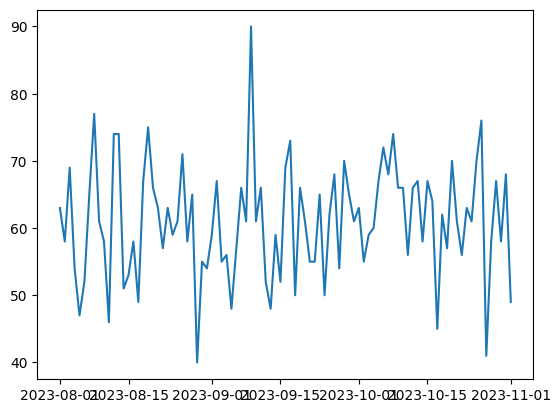

In [19]:
plt.plot(test_date, test_count)

In [27]:
len(test_count)

93

123

Text(0, 0.5, 'count')

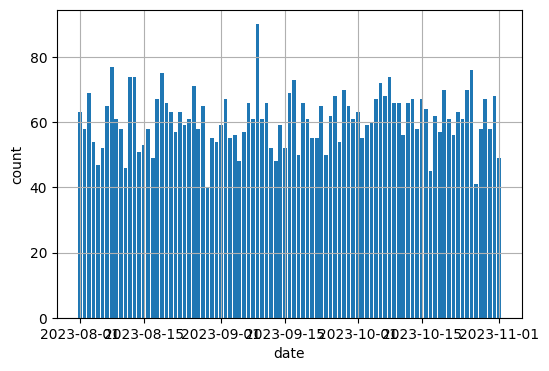

In [34]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.bar(test_date, test_count)
ax.grid()
ax.set_xlabel('date')
ax.set_ylabel('count')

<Axes: >

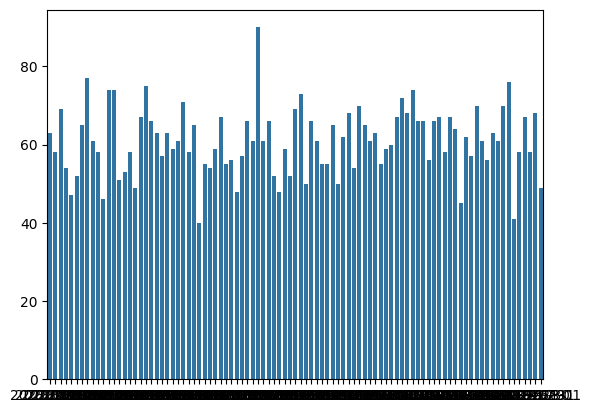

In [20]:
sns.barplot(x=test_date, y=test_count)

<Axes: xlabel='converted', ylabel='count'>

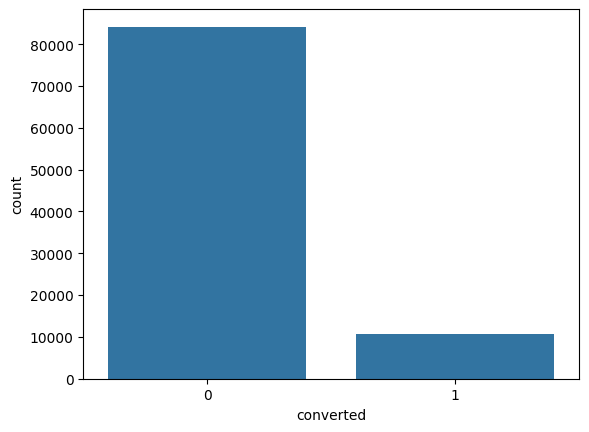

In [24]:
sns.countplot(x=df['converted'])